This Python script uses the Alpha Vantage API to fetch and visualize financial data. Here’s a breakdown of what the code does:

* __Imports:__ The necessary libraries and modules are imported.

* __API Key:__ The Alpha Vantage API key is defined.

* __plot_data Function:__ This function fetches and plots data for a given symbol (like ‘AAPL’ for Apple Inc.). It does the following:

                    *Fetches intraday data for the symbol and plots the closing prices.
                    *Fetches sector performance data and plots the real-time performance per sector.
                    *Fetches daily digital currency data for the symbol and plots the daily close value.

* __get_data_async Function:__ This asynchronous function fetches data for multiple symbols concurrently. It creates a task for each symbol, gathers the results from all tasks, and then closes each task.

* __Symbols Definition:__ The symbols for which data is to be fetched are defined.

* __Data Fetching and Plotting:__ The plot_data function is called for each symbol to fetch and plot the data.

* __Asynchronous Data Fetching:__ The get_data_async function is called to fetch data for all symbols concurrently. The results are printed.

This script will output a series of plots for each symbol showing the intraday time series, the real-time performance per sector, and the daily close value for the digital currency. Additionally, it would print the results of the asynchronous data fetching, which would be the data fetched for each symbol.

In [1]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from alpha_vantage.async_support.timeseries import TimeSeries as AsyncTimeSeries
import matplotlib.pyplot as plt
import asyncio

In [2]:
# Define your Alpha Vantage API key
API_KEY = 'Enter Your API KEY'  

# Function to handle API calls and plot data
def plot_data(symbol, market='CNY', interval='1min', outputsize='full'):
    try:
        # Create a TimeSeries object
        ts = TimeSeries(key=API_KEY, output_format='pandas')
        # Get intraday data
        data, _ = ts.get_intraday(symbol=symbol, interval=interval, outputsize=outputsize)
        # Plot closing prices
        data['4. close'].plot()
        plt.title(f'Intraday Times Series for the {symbol} stock ({interval})')
        plt.show()

        # Create a SectorPerformances object
        sp = SectorPerformances(key=API_KEY, output_format='pandas')
        # Get sector performance data
        data, _ = sp.get_sector()
        # Plot real-time performance per sector
        data['Rank A: Real-Time Performance'].plot(kind='bar')
        plt.title('Real Time Performance (%) per Sector')
        plt.tight_layout()
        plt.grid()
        plt.show()

        # Create a CryptoCurrencies object
        cc = CryptoCurrencies(key=API_KEY, output_format='pandas')
        # Get daily digital currency data
        data, _ = cc.get_digital_currency_daily(symbol=symbol, market=market)
        # Plot daily close value
        data['4b. close (USD)'].plot()
        plt.tight_layout()
        plt.title(f'Daily close value for {symbol}')
        plt.grid()
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

In [3]:
# Async function to get data for multiple symbols
async def get_data_async(symbols):
    tasks = []
    for symbol in symbols:
        # Create an AsyncTimeSeries object
        ts = AsyncTimeSeries(key=API_KEY)
        # Create a task for each symbol
        task = asyncio.ensure_future(ts.get_quote_endpoint(symbol))
        tasks.append(task)
    # Gather results from all tasks
    results = await asyncio.gather(*tasks)
    # Close each task
    for task in tasks:
        await task.close()
    return results

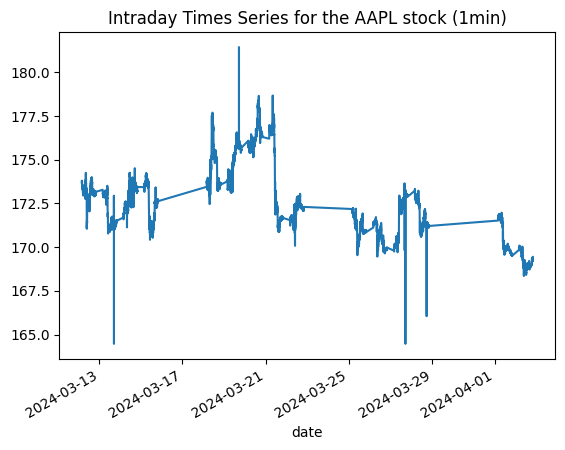

An error occurred: Error getting data from the api, no return was given.


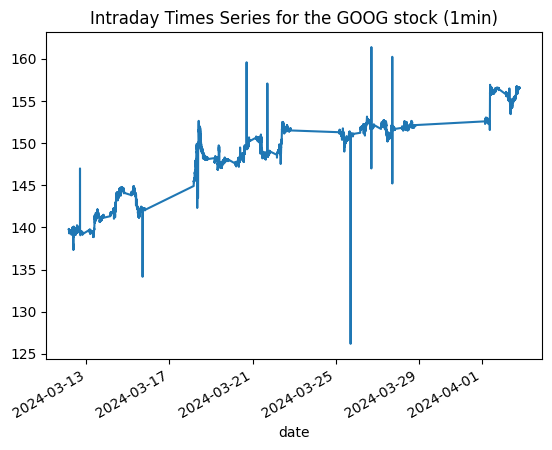

An error occurred: Error getting data from the api, no return was given.


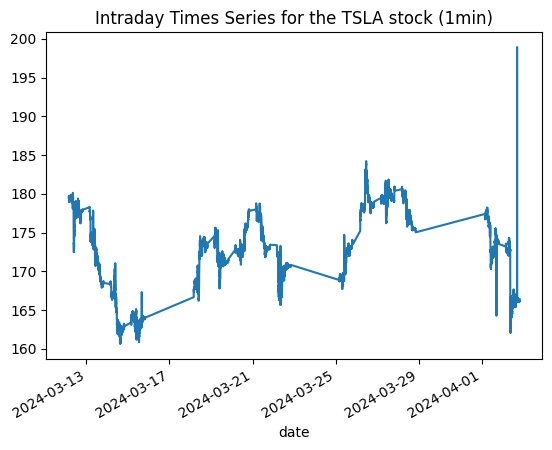

An error occurred: Error getting data from the api, no return was given.


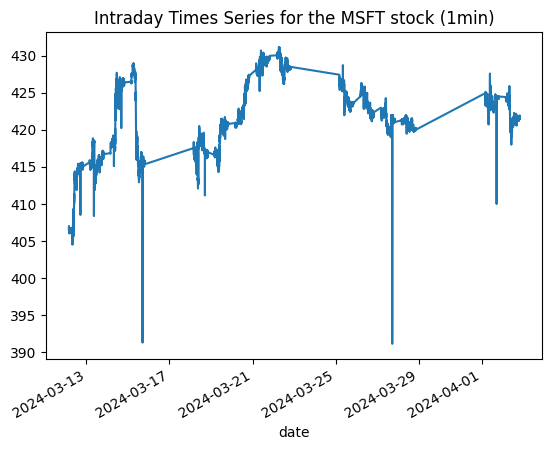

An error occurred: Error getting data from the api, no return was given.


RuntimeError: asyncio.run() cannot be called from a running event loop

In [4]:
# Define the symbols for which you want to get data
symbols = ['AAPL', 'GOOG', 'TSLA', 'MSFT']
for symbol in symbols:
    # Call the plot_data function for each symbol
    plot_data(symbol)

# Call the async function and print the results
results = asyncio.run(get_data_async(symbols))
print(results)